In [16]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


# Clustering analysis

Use various clustering techniques to identify a good subset of questions.

---

In [17]:
import os
import sys
from contextlib import suppress

import pandas as pd
import seaborn as sns

# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.pardir, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport features.build_features
%aimport visualization.visualize
from visualization.visualize import biplot, plot_explained_variance, triplot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
df = pd.read_csv("../data/processed/1996.csv", index_col=0)

In [19]:
df.head()

,PartyID,Abortion,MoralRelativism,NewerLifestyles,MoralTolerance,TraditionalFamilies,GayJobDiscrimination,GayMilitaryService,NationalHealthInsurance,StandardOfLiving,ServicesVsSpending,AffirmativeAction
0,-3.0,2.0,-5.0,1.0,-2.0,2.0,-1.0,-5.0,NaN,-5.0,3.0,-1.0
1,-2.0,4.0,-1.0,1.0,-1.0,1.0,-1.0,-2.0,-4.0,-4.0,2.0,-4.0
2,-1.0,4.0,-2.0,3.0,-3.0,2.0,-4.0,-4.0,-3.0,-3.0,4.0,-4.0
3,-1.0,2.0,-2.0,2.0,-2.0,2.0,NaN,-4.0,-3.0,-4.0,2.0,-2.0
4,-3.0,4.0,-2.0,4.0,-3.0,3.0,-2.0,-1.0,-7.0,-6.0,1.0,-5.0


---

## Correlations in data

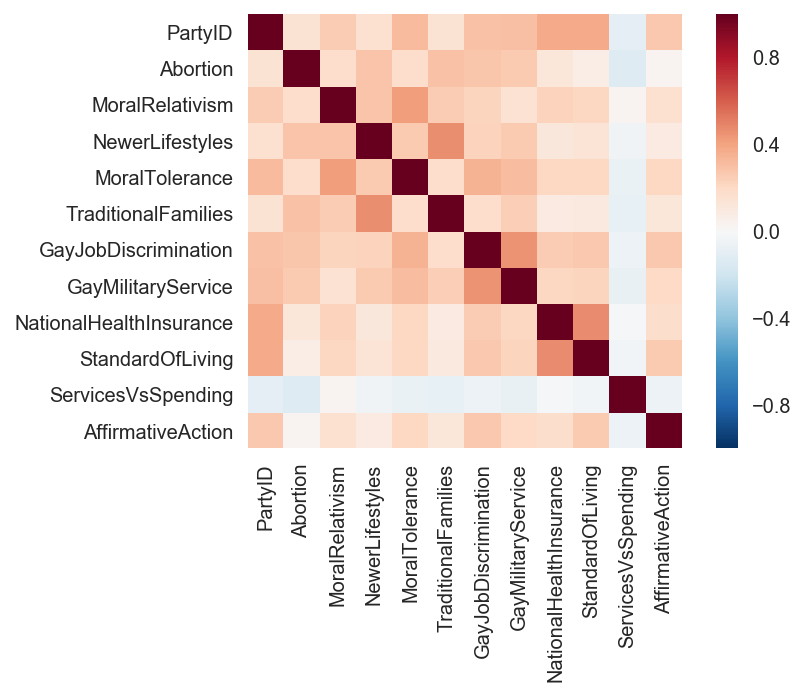

In [20]:
# Spearman is recommended for ordinal data.
correlations = df.corr(method='spearman')
sns.heatmap(correlations,
           square=True);

Note that if we were to scale the data, the correlation matrix would be unchanged.

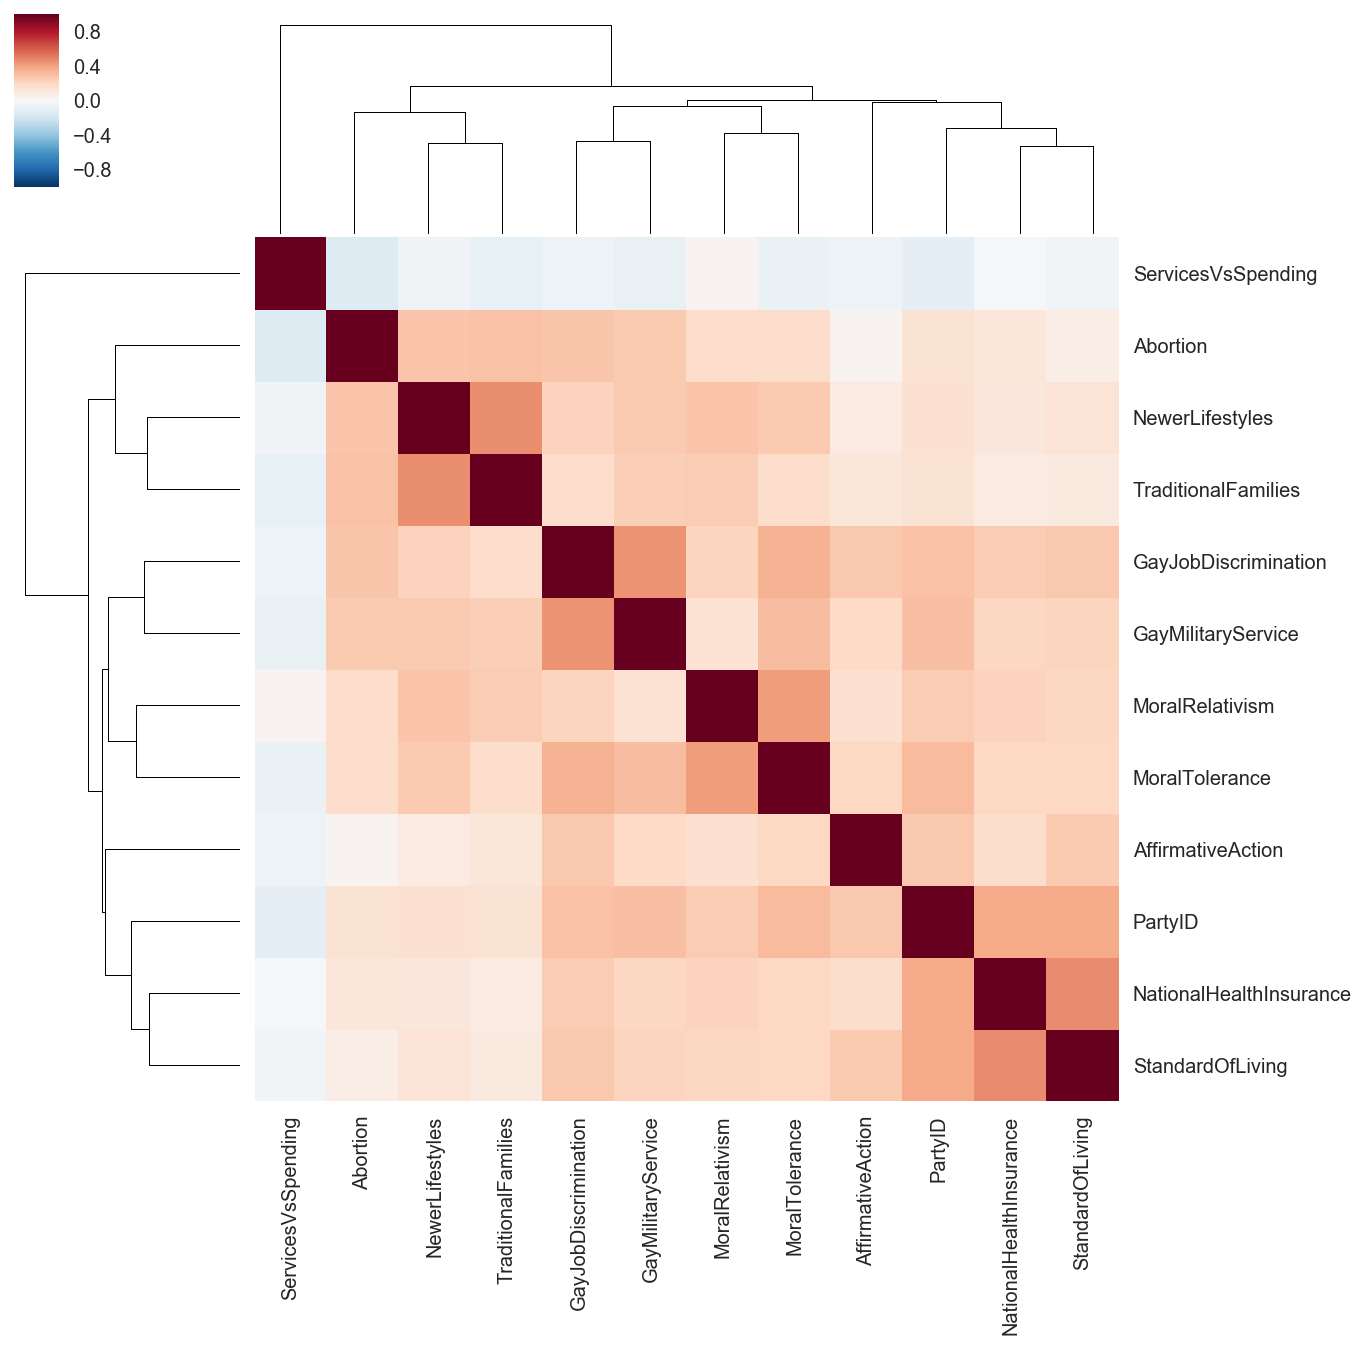

In [21]:
import warnings
with warnings.catch_warnings():   
    warnings.simplefilter("ignore")
    cg = sns.clustermap(correlations, square=True)
    plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),
             rotation=0);  # Fix rotation of y-labels.

**UPDATE ME**

The strongest clusters were:

- 665: who did you vote for?
- 796: allow abortion?
- 911: favor strict gun control?
- 757: is poverty structural?

and 

- 273: public vs private insurance
- 241: should gov't guarantee standard of living
- 264: should we aid minorities

## Principal component analysis

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer, StandardScaler

imp = Imputer(strategy='mean')
scl = StandardScaler()
pca = PCA()
pipeline = Pipeline([
        ('imp', imp),
        ('scl', scl),
        ('pca', pca),
    ])
scaler_pipeline = Pipeline([
        ('imp', imp),
        ('scl', scl),
    ])
data_pca = pipeline.fit_transform(df)
_scaled = scaler_pipeline.transform(df)

### Explained variance

How much of the variance in the data is explained by each successive component?

In [23]:
plot_explained_variance(pca)

### Biplot

A scatterplot projected onto the first two principal components.

In [24]:
data_scaled = pd.DataFrame(_scaled, columns=df.columns)
triplot(pca, data_scaled, title='ANES 1996 Biplot', color=data_scaled.PartyID)

In [25]:
biplot(pca, data_scaled, title='ANES 1996 Biplot', color=data_scaled.PartyID)

In [26]:
pca.explained_variance_

array([ 3.23641189,  1.43181664,  1.06329955,  0.94927953,  0.91771438,
        0.8592212 ,  0.710931  ,  0.65105971,  0.57291138,  0.55553557,
        0.54424211,  0.50757703])

In [27]:
sorted(list(zip(df.columns, pca.components_[0])), key=lambda x: np.abs(x[1]), reverse=True)

[('MoralTolerance', -0.35649549914779233),
 ('GayJobDiscrimination', -0.34937119978491676),
 ('PartyID', -0.3393548054515802),
 ('GayMilitaryService', -0.3337881324524869),
 ('MoralRelativism', -0.30349298137409447),
 ('NewerLifestyles', -0.29028410269191951),
 ('NationalHealthInsurance', -0.27937669255231345),
 ('StandardOfLiving', -0.278327334615877),
 ('TraditionalFamilies', -0.27662722037829013),
 ('Abortion', -0.23969379683805114),
 ('AffirmativeAction', -0.2328214687919346),
 ('ServicesVsSpending', 0.064827920812586953)]